In [40]:
import boto3
import json
import re
import pandas as pd
import numpy as np

In [41]:
s3client = boto3.client('s3')
textclient = boto3.client('textract')

#### Image File
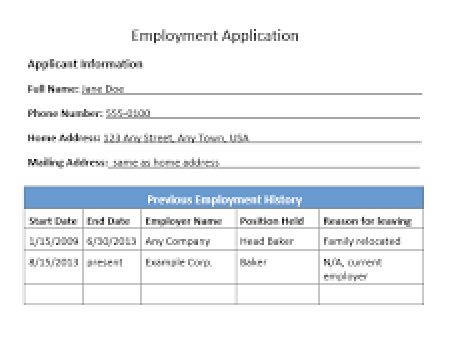

In [42]:
## Response is a set of blocks ##
## Each block has a block type, could be PAGE; LINE, WORD, KEY_VALUE_SET

response = textclient.analyze_document(
    Document={
        'S3Object': {
            'Bucket': 'sample-compdocs',
            'Name': 'data/testimage.png'
        }
    },
    FeatureTypes=['FORMS']
)

response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9975845217704773,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 1.038942158089053e-16, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.9975845217704773},
     {'X': 0.0, 'Y': 0.9975845217704773}]},
   'Id': '56854389-ff80-4b58-8f46-e6c8f0f62cf6',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['c8765a99-faee-437a-96d2-c16225276356',
      'e6412da3-91f7-4fb1-ba5c-c475d59c1bec',
      '0e8585cc-34e0-4d4b-a48f-ba1a07e8507d',
      '7ec0d693-1b0e-468f-8664-c6fdd6e89e25',
      'a75d34ae-5c58-4569-8dff-fd042ac36694',
      'db7fba65-de9b-4f4a-a03e-a54c7cf260c3',
      '7128b4cd-06c5-423c-9f11-4a8ebb91db0a',
      'da5a9390-1abc-4dd4-86d4-0cde56a182ac',
      '60332b35-083a-4c68-a9a1-7ef0d899db8e',
      '5ef0f946-0ef9-49ab-b63e-13dfff8f65c8',
      '232c4e20-d47a-4c99-9146-1167de4983ec',
      '0edab8c2-8ef4-4796-a31e-daa40acf93a8'

#### Shape of the response
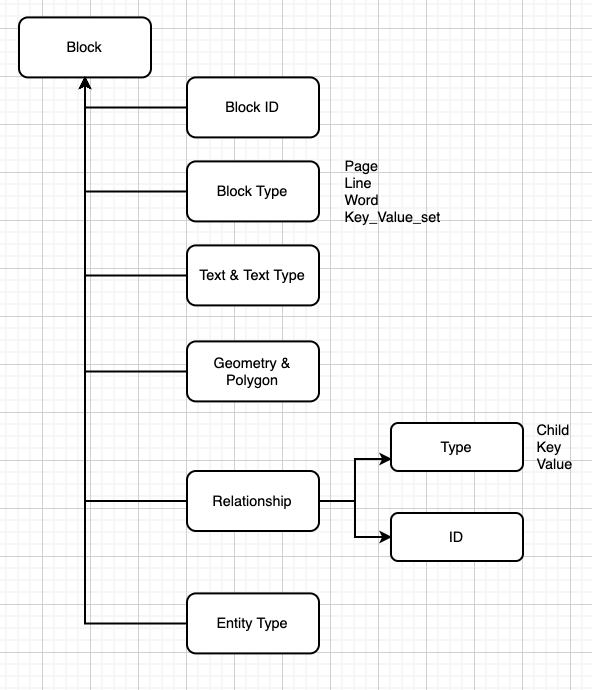

In [ ]:
print('Words')
print('-----------------------------------')
words = {}
for block in blocks:
    blockid = block['Id']
    if block['BlockType'] == 'WORD':
        words[blockid] = block['Text']
        #print(block['Text'])
        
print(words)

In [45]:
## Get all the blocks, key blocks and value blocks
## Each KEY_VALUE SET has an entity which denotes, if it is a KEY or VALUE

block_map = {}
key_map = {}
value_map = {}

for block in blocks:
    block_id = block['Id']
    block_map[block_id] = block
    if block['BlockType'] == "KEY_VALUE_SET":
        if 'KEY' in block['EntityTypes']:
            key_map[block_id] = block
        elif 'VALUE' in block['EntityTypes']:
            value_map[block_id] = block

In [54]:
print("Number of blocks = "+ str(len(block_map)))
print("Number of Keys = "+ str(len(key_map)))
print("Number of Value = "+ str(len(value_map)))

#print(len(value_map))

Number of blocks = 75
Number of Keys = 4
Number of Value = 4


In [ ]:
## Each KEY VALUE_SET block has set of relationships
## each Relationshp has a Type and IDs of the relationship

for key, keyblock in key_maps:
    for relationship in keyblock['Relationships']:
        if relationship['Type'] == 'VALUE':
            for each val in relationship['Ids']:
                val_ids[]
            

In [ ]:
def get_kv_relationship(key_map, value_map, block_map):
    kvs = {}
    for block_id, key_block in key_map.items():
        value_block = find_value_block(key_block, value_map)
        key = get_text(key_block, block_map)
        val = get_text(value_block, block_map)
        kvs[key] = val
    return kvs

def find_value_block(key_block, value_map):
    for relationship in key_block['Relationships']:
        if relationship['Type'] == 'VALUE':
            for value_id in relationship['Ids']:
                value_block = value_map[value_id]
    return value_block

def get_text(result, blocks_map):
    text = ''
    if 'Relationships' in result:
        for relationship in result['Relationships']:
            if relationship['Type'] == 'CHILD':
                for child_id in relationship['Ids']:
                    word = blocks_map[child_id]
                    if word['BlockType'] == 'WORD':
                        text += word['Text'] + ' '
                    if word['BlockType'] == 'SELECTION_ELEMENT':
                        if word['SelectionStatus'] == 'SELECTED':
                            text += 'X '    

                                
    return text

def print_kvs(kvs):
    for key, value in kvs.items():
        print(key, ":", value)

In [21]:
# Get Key Value relationship
kvs = get_kv_relationship(key_map, value_map, block_map)
print("\n\n== FOUND KEY : VALUE pairs ===\n")
print_kvs(kvs)